In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("spotify-2023_fixed.csv")


In [3]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
df["streams"] = pd.to_numeric(df["streams"], errors= "coerce")

1. Selecting the most popular musics in playlist
2. Creating and adding them to "Popularity" row

In [5]:
unique = df.nunique()
df["streams"] = pd.to_numeric(df["streams"], errors= "coerce")
df.loc[df["streams"]> 1000000000, "streamed_times"] = ">Billion"
df.loc[(df["streams"]> 500000000) & (df["streams"]< 1000000000), "streamed_times"] = ">5k Million"
df.loc[df["streams"]< 500000000, "streamed_times"] = "<5k Million"


#   What songs are the most popular within the Spotify users? 

df.loc[df["in_spotify_playlists"]> 10000, "popular_in_spotify" ] ="Very popular <10k"
df.loc[df["in_spotify_playlists"]< 1000, "popular_in_spotify" ] ="less than 1k"
df.loc[(df["in_spotify_playlists"]< 10000)& (df["in_spotify_playlists"]> 5000), "popular_in_spotify" ] ="popular <5k"
df.loc[(df["in_spotify_playlists"]>1000)& (df["in_spotify_playlists"]< 5000), "popular_in_spotify" ] ="average <1k"


- Remove nan values from df

In [6]:
df.dropna(subset=["streams"], inplace=True)

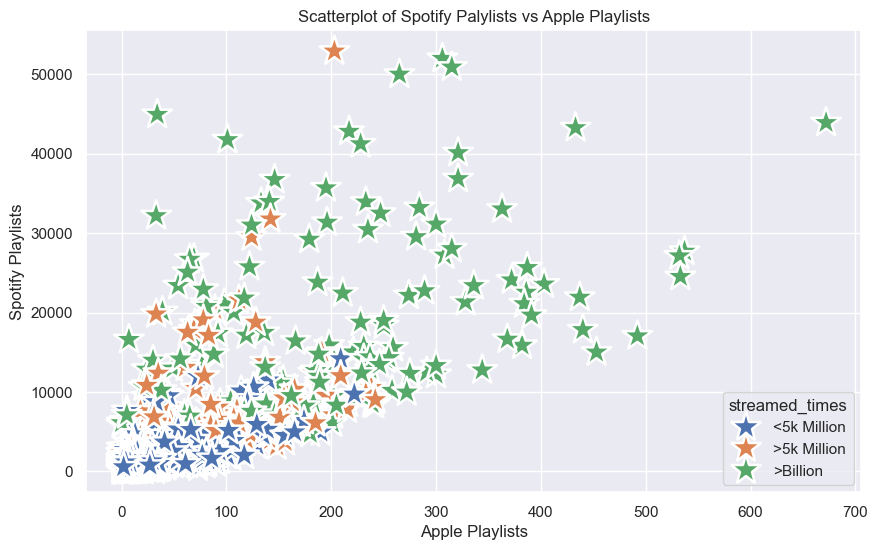

In [7]:
sns.set(rc={"figure.figsize": (10, 6)})
df["streams"] = df["streams"].sort_values()
sns.scatterplot(data=df,
            x="in_apple_playlists",
            y="in_spotify_playlists",
            hue="streamed_times",
            s = 500,
            marker="*",
            )
plt.title("Scatterplot of Spotify Palylists vs Apple Playlists")
plt.xlabel("Apple Playlists")
plt.ylabel("Spotify Playlists")
plt.show()

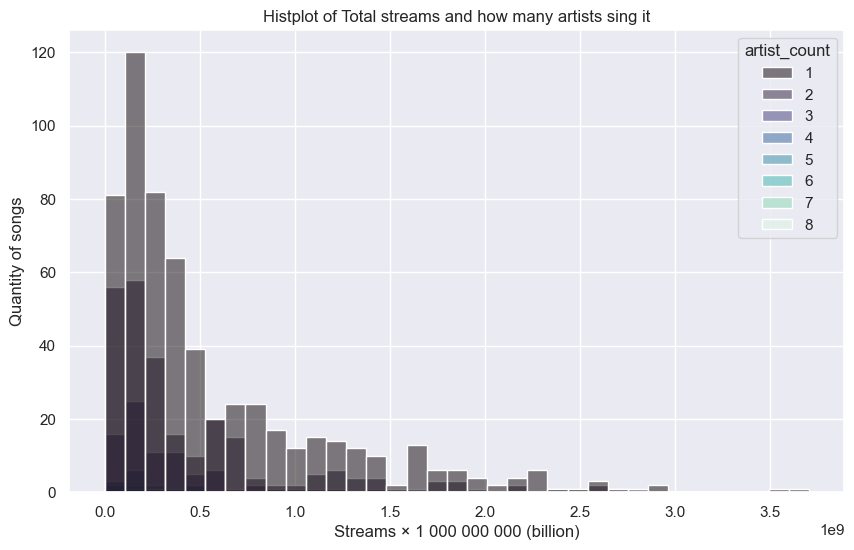

In [8]:
sns.histplot(data=df,
            x="streams",
            hue="artist_count",
            palette="mako"
            )

plt.xlabel("Streams × 1 000 000 000 (billion)")
plt.title("Histplot of Total streams and how many artists sing it")
plt.ylabel("Quantity of songs")
plt.show()

sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")